<a href="https://colab.research.google.com/github/Harika822/projects/blob/master/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x=data.drop('Outcome',axis=1).values
y=data['Outcome'].values

In [ ]:
#split the 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [ ]:
#solver{'newton-cg','lbfgs','liblinear','sag',''saga'},default='lbfgs'

#instantiate the model(using the default parameters)
logreg=LogisticRegression(solver='liblinear',max_iter=200,random_state=1)
#logreg=LogisticRegression(solver='newton-cg',max_iter=200,random_state=1)
#logreg=LogisticRegression(solver='saga',max_iter=200,random_state=1)

In [ ]:
#fit the model
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predict with test data
y_pred=logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
#import the metric class
from sklearn import metrics 
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[100,  23],
       [ 26,  43]])

In [ ]:
#import required modules
import matplotlib.pyplot as plt
import seaborn as sns

Text(33.0, 0.5, 'actual label')

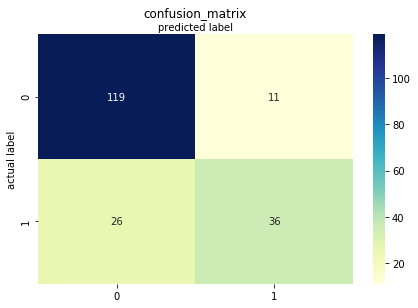

In [ ]:
class_names=[0,1] #name of classes
fig,ax=plt.subplots()
tick_mark=np.arange(len(class_names))
plt.xticks(tick_mark,class_names)
plt.yticks(tick_mark,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('confusion_matrix',y=1.1)
plt.xlabel('predicted label')
plt.ylabel('actual label')  

In [ ]:
#confusion matrix evaluation metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226
